NEURAL NETWORK PERFOMANCE INVESTIGATION

In [1]:
#importing stuff needed, including tensorflow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense

2022-03-17 14:28:55.498371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-17 14:28:55.498448: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
#First of all let`s generate the data we`ll work with
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

#generating a folder to keep our data
!mkdir DATA

In [7]:
# a nonlinear classifier function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r

#define function to create data
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

2 5 1


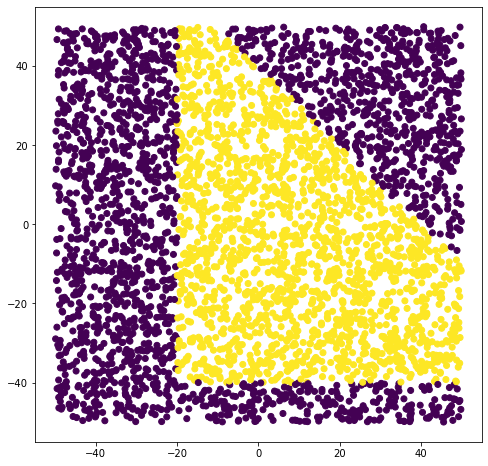

In [9]:
TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

In [12]:
#generating the data for the default dataset
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)

#let`s generate the files to store the first default dataset and its labels
np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")



#generating the data for the second (reduced) dataset
N=3000
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
#let`s generate the file to store the second dataset and its labels
np.savetxt(filename("data(reduced)",TYPE),x)
np.savetxt(filename("labels(reduced)",TYPE),y,fmt="%d")




#generating the data for the third (increased) dataset
N=10000
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
#let`s generate the file to store the third dataset (increased) and its labels
np.savetxt(filename("data(increased)",TYPE),x)
np.savetxt(filename("labels(increased)",TYPE),y,fmt="%d")




#generating the data for the forth (augmented) dataset
N=4000
x,y = (np.random.random((N,2))-0.5)*B+np.random.random((N,2)), np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)

#let`s generate the file to store the forth dataset (augmented) and its labels
np.savetxt(filename("data(augmented)",TYPE),x)
np.savetxt(filename("labels(augmented)",TYPE),y,fmt="%d")

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0


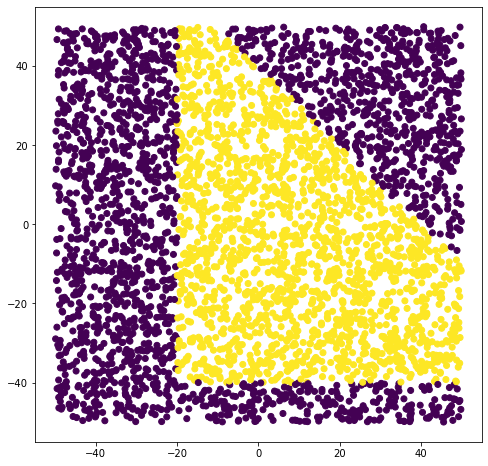

In [25]:
#Now let's load the first dataset to start its analysis
TYPE=1
x = np.loadtxt(filename("data",TYPE),delimiter=' ')
y = np.loadtxt(filename("labels",TYPE),delimiter=' ')
N=len(x)

#plot the labeled data
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

In [27]:
#Let's set a tap to divide our data in training and test set
k=0.8
N_train = int(k*N)
# train validation split
(x_train,y_train) = (x[:N_train],y[:N_train])
(x_valid,y_valid) = (x[N_train:],y[N_train:])

# rescaling
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

1
Epoch 1/100
64/64 [==============================] - 3s 19ms/step - loss: 0.6421 - accuracy: 0.6906 - val_loss: 0.6241 - val_accuracy: 0.6950
Epoch 2/100
64/64 [==============================] - 1s 8ms/step - loss: 0.6057 - accuracy: 0.7172 - val_loss: 0.5902 - val_accuracy: 0.7375
Epoch 3/100
64/64 [==============================] - 1s 8ms/step - loss: 0.5614 - accuracy: 0.7647 - val_loss: 0.5431 - val_accuracy: 0.7725
Epoch 4/100
64/64 [==============================] - 1s 8ms/step - loss: 0.5024 - accuracy: 0.8044 - val_loss: 0.4876 - val_accuracy: 0.8050
Epoch 5/100
64/64 [==============================] - 0s 8ms/step - loss: 0.4451 - accuracy: 0.8306 - val_loss: 0.4380 - val_accuracy: 0.8313
Epoch 6/100
64/64 [==============================] - 0s 8ms/step - loss: 0.3964 - accuracy: 0.8491 - val_loss: 0.3953 - val_accuracy: 0.8438
Epoch 7/100
64/64 [==============================] - 0s 8ms/step - loss: 0.3582 - accuracy: 0.8609 - val_loss: 0.3705 - val_accuracy: 0.8388
Epoch 8/10

TypeError: 'Text' object is not callable

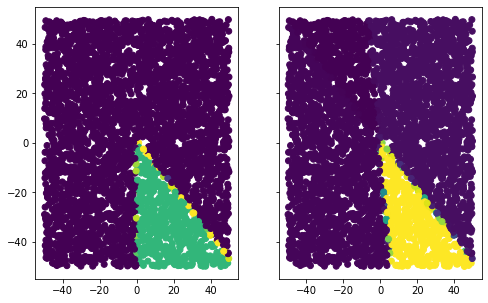

In [51]:
#Now let's built two options for neural networks (two different kinds of architectures)

#reproducibility
np.random.seed(204048)

for CASE in range(1,3):
    print(CASE)
    if CASE==1:
        model = Sequential()
        model.add(Dense(L,input_shape=(L,),activation='relu')) #input layer
        model.add(Dense(20,activation='relu')) #first layer
        model.add(Dense(20,activation='relu')) #second layer
        model.add(Dense(1,activation='sigmoid')) # final output
        nepoch=100    
        
        model.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
        model.fit(x_train,y_train, epochs=nepoch,batch_size = 50,
               validation_data=(x_valid,y_valid))
        y_pred = model.predict(x)

        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,5))
        ax1.scatter(x[:,0],x[:,1],c=y_pred)

        
    if CASE==2:
        model = Sequential()
        model.add(Dense(L,input_shape=(L,),activation='sigmoid')) #input layer
        model.add(Dense(3,activation='sigmoid'))
        model.add(Dense(1,activation='sigmoid'))
        nepoch=100

        model.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
        model.fit(x_train,y_train, epochs=nepoch,batch_size = 50,
               validation_data=(x_valid,y_valid))
        y_pred = model.predict(x)

        ax2.scatter(x[:,0],x[:,1],c=y_pred)




In [39]:

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [40]:
model.fit(x_train,y_train, epochs=nepoch,batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 2s - loss: 0.7226 - accuracy: 0.5719 - val_loss: 0.6729 - val_accuracy: 0.6787 - 2s/epoch - 39ms/step
Epoch 2/400
64/64 - 1s - loss: 0.6369 - accuracy: 0.6897 - val_loss: 0.6234 - val_accuracy: 0.6963 - 528ms/epoch - 8ms/step
Epoch 3/400
64/64 - 1s - loss: 0.5930 - accuracy: 0.7075 - val_loss: 0.6013 - val_accuracy: 0.7050 - 583ms/epoch - 9ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5681 - accuracy: 0.7194 - val_loss: 0.5813 - val_accuracy: 0.7100 - 424ms/epoch - 7ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5466 - accuracy: 0.7253 - val_loss: 0.5622 - val_accuracy: 0.7138 - 416ms/epoch - 7ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5268 - accuracy: 0.7378 - val_loss: 0.5420 - val_accuracy: 0.7250 - 432ms/epoch - 7ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5072 - accuracy: 0.7478 - val_loss: 0.5187 - val_accuracy: 0.7375 - 423ms/epoch - 7ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4858 - accuracy: 0.7606 - val_loss: 0.4943 - val_accuracy: 0.7550 - 432ms/epoch - 7ms/step
Epoch 9/40

[[0.        ]
 [0.00030687]
 [0.00030687]
 [0.00030687]
 [0.00030687]]


<function matplotlib.pyplot.show(close=None, block=None)>

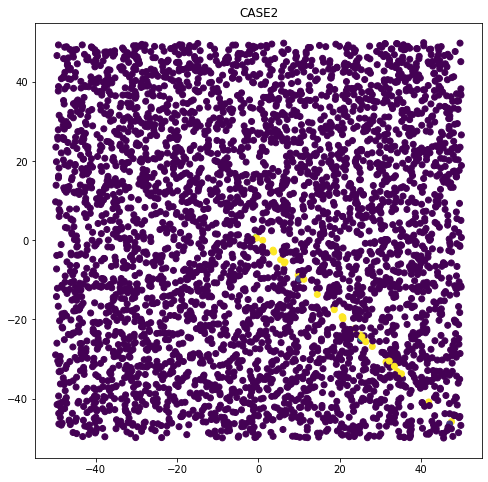

In [41]:
y_pred = model.predict(x)
print(y_pred[:5])
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.title("CASE1")
plt.show